<a href="https://colab.research.google.com/github/BintangPray/Kelompok-5-P2/blob/main/FINAL_LSTM%20HARGA%20CABAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

# Impor Data

In [2]:
np.random.seed(7)

In [3]:
data = pd.read_excel("Residual.xlsx")
data = data.loc[:, ['Tanggal','Residual']]
data = data.iloc[:700].reset_index(drop=True)
print(data.head())
print(data.shape)

     Tanggal     Residual
0 2022-09-01     0.000000
1 2022-09-02 -4332.389117
2 2022-09-03 -2168.018474
3 2022-09-04 -2666.770071
4 2022-09-05  -872.410987
(700, 2)


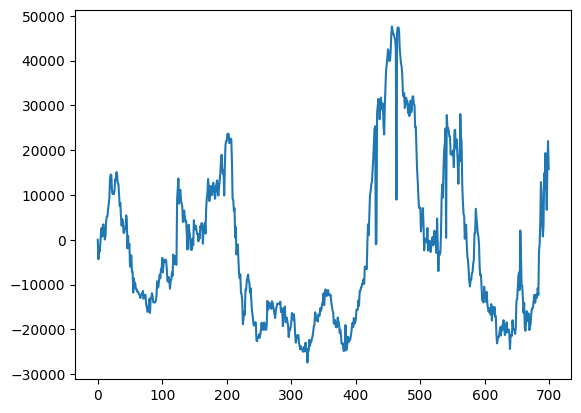

In [4]:
plt.plot(data['Residual'])

### Normalisasi Data

Proses normalisasi data dilakukan menggunakan metode _min-max normalization_ hingga menghasilkan data yang bersakala [0,1].

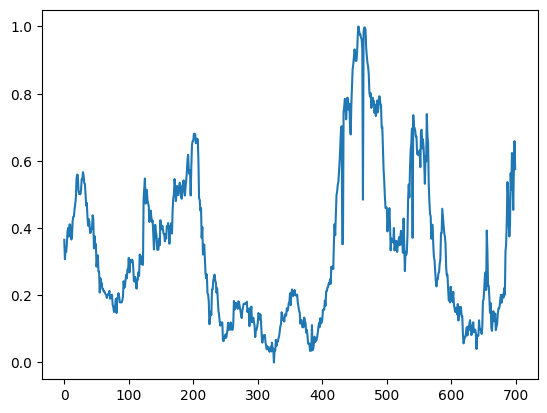

In [5]:
# Step 1: Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data['Residual_normalized'] = scaler.fit_transform(data['Residual'].values.reshape(-1, 1))
plt.plot(data['Residual_normalized'])

# Hyperparameter Tuning

_Hyperparameter tuning_ dilakukan untuk menentukan _hyperparameter_ terbaik melalui langkah validasi berupa _time series k-fold cross validation_. Banyaknya _fold_ yang digunakan dalam langkah validasi adalah sebanyak 5.

### Skenario 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


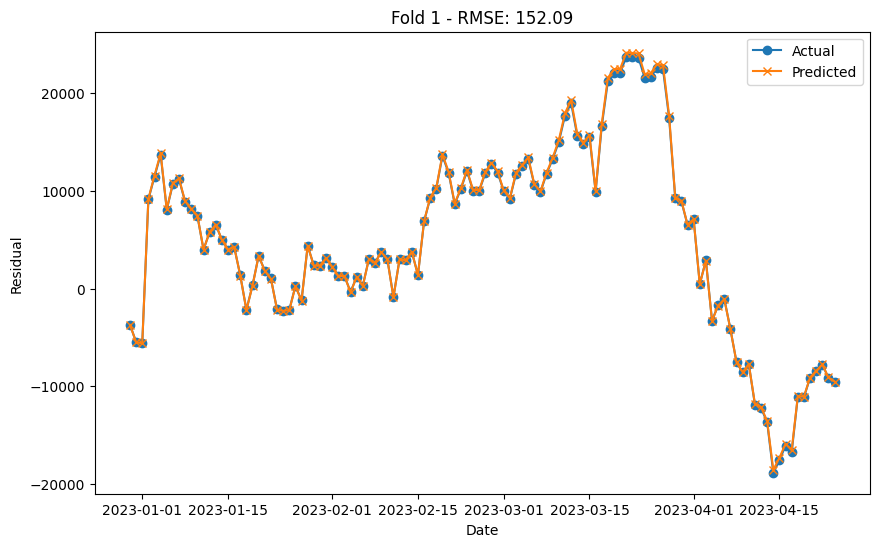

Fold 1 - RMSE: 152.09


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


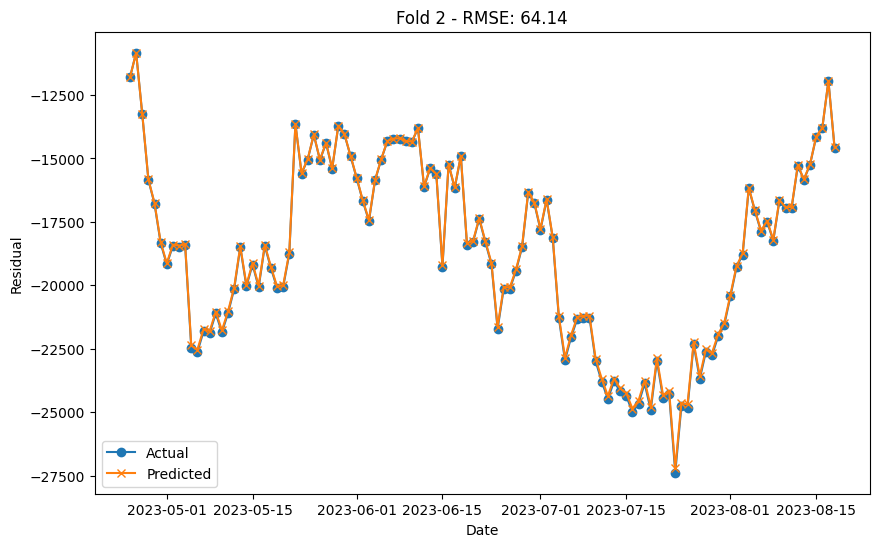

Fold 2 - RMSE: 64.14


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


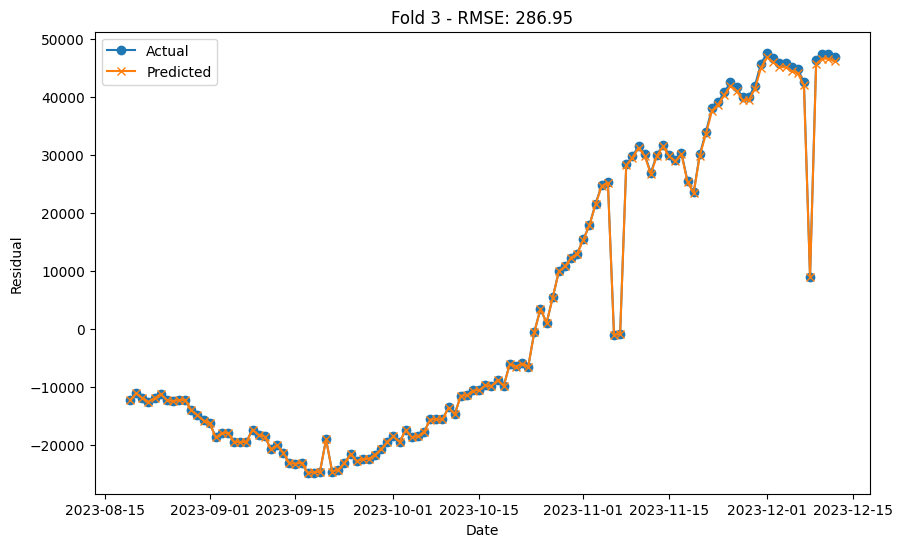

Fold 3 - RMSE: 286.95


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


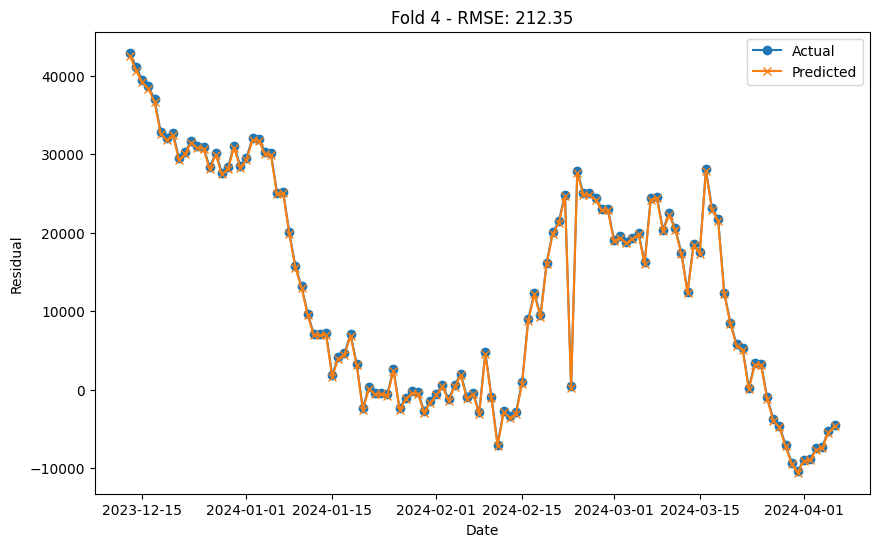

Fold 4 - RMSE: 212.35


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


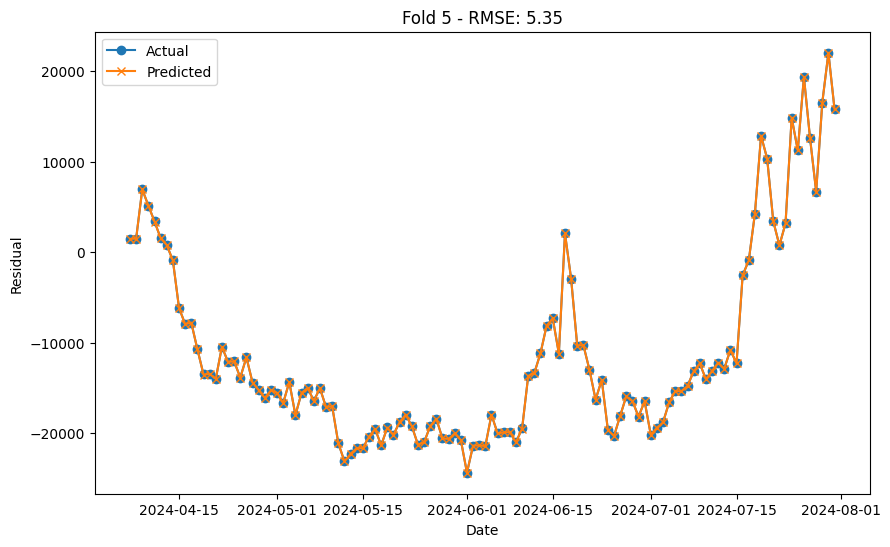

Fold 5 - RMSE: 5.35


In [6]:
#LEARNING RATE: 0,01 dan BATCH SIZE: 16

from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

# Define hyperparameters
learning_rate = 0.01
batch_size = 16
epochs = 100
neurons = 50
time_step = 30

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize list to store RMSE values for each fold
rmse_values = []

# Iterate over each fold
for i, (train_index, test_index) in enumerate(tscv.split(data['Residual_normalized'])):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]

    # Create and train LSTM model
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(time_step, 1)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)  # Inisialisasi optimizer dengan learning rate
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(train_data['Residual_normalized'].values.reshape(-1, 1),
              train_data['Residual_normalized'].values.reshape(-1, 1),
              epochs=epochs, batch_size=batch_size, verbose=0)

    # Make predictions
    predictions = model.predict(test_data['Residual_normalized'].values.reshape(-1, 1))
    denormalized_predictions = scaler.inverse_transform(predictions)

    # Calculate RMSE
    actual_values = test_data['Residual'].values
    rmse = np.sqrt(mean_squared_error(actual_values, denormalized_predictions))
    rmse_values.append(rmse)

    # Plot predictions
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['Tanggal'], actual_values, label='Actual', marker='o')
    plt.plot(test_data['Tanggal'], denormalized_predictions, label='Predicted', marker='x')
    plt.title(f"Fold {i+1} - RMSE: {rmse:.2f}")
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.legend()
    plt.show()

    print(f"Fold {i+1} - RMSE: {rmse:.2f}")

### Skenario 2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


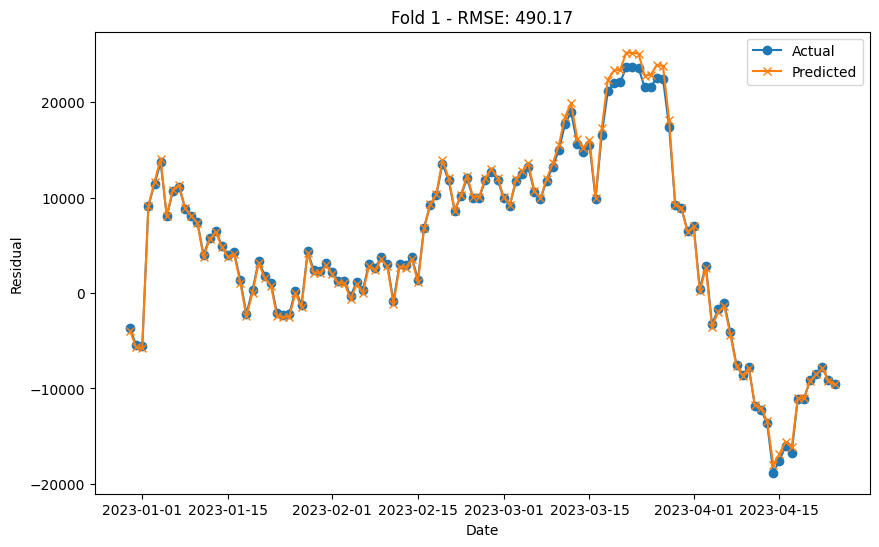

Fold 1 - RMSE: 490.17


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


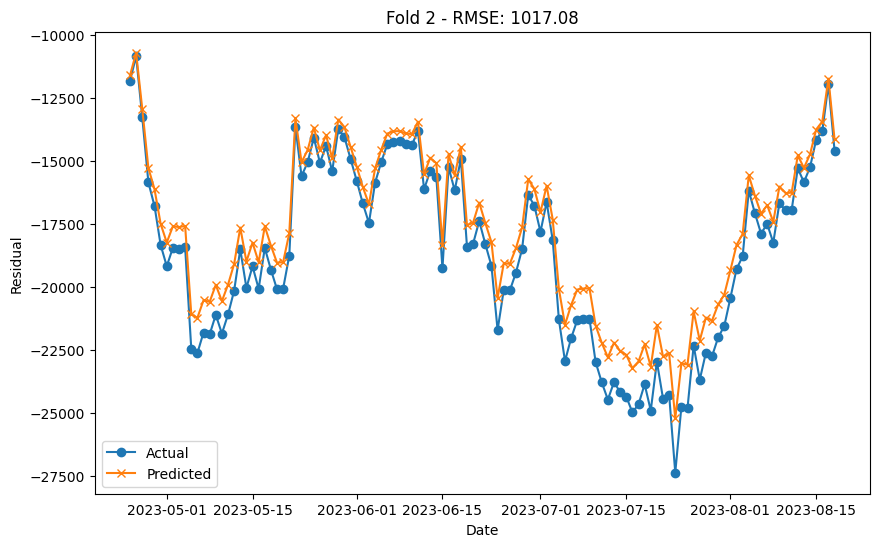

Fold 2 - RMSE: 1017.08


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


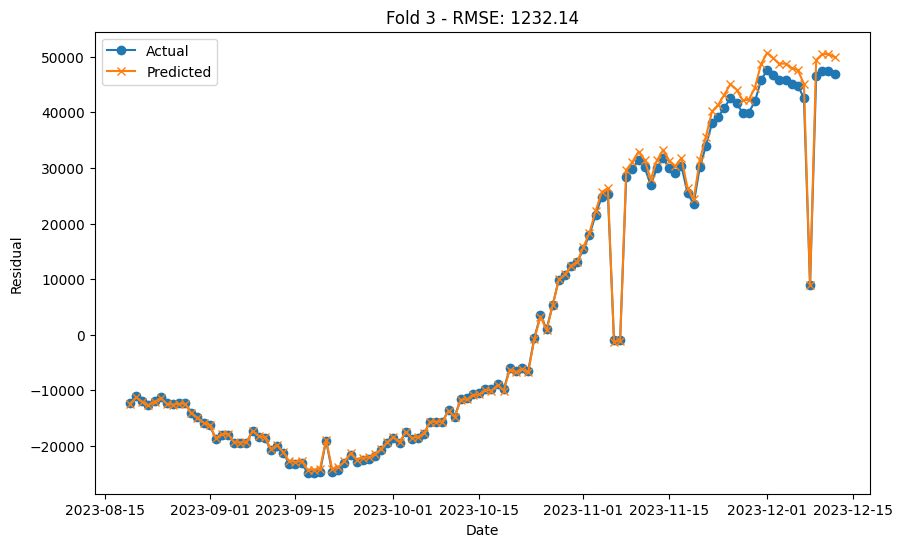

Fold 3 - RMSE: 1232.14


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


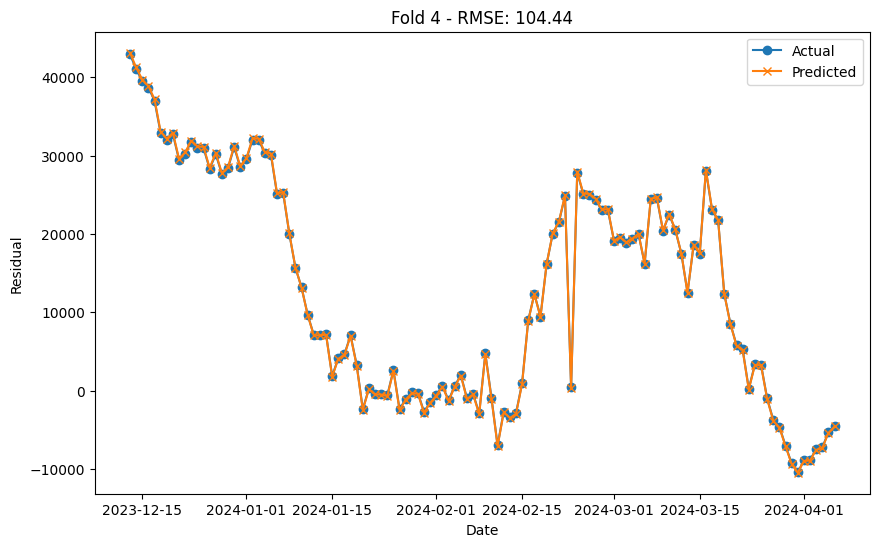

Fold 4 - RMSE: 104.44


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


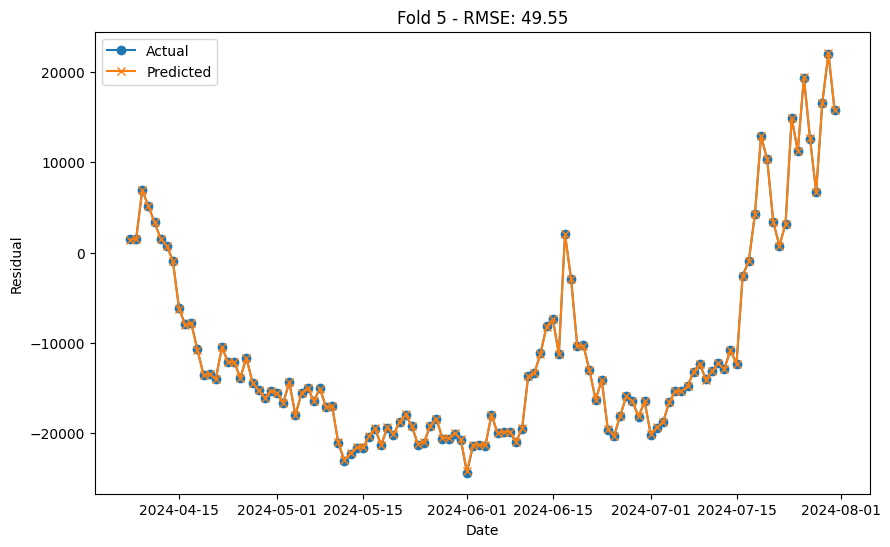

Fold 5 - RMSE: 49.55


In [7]:
#LEARNING RATE: 0,001 dan BATCH SIZE: 16

from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

# Define hyperparameters
learning_rate = 0.001
batch_size = 16
epochs = 100
neurons = 50
time_step = 30

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize list to store RMSE values for each fold
rmse_values = []

# Iterate over each fold
for i, (train_index, test_index) in enumerate(tscv.split(data['Residual_normalized'])):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]

    # Create and train LSTM model
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(time_step, 1)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)  # Inisialisasi optimizer dengan learning rate
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(train_data['Residual_normalized'].values.reshape(-1, 1),
              train_data['Residual_normalized'].values.reshape(-1, 1),
              epochs=epochs, batch_size=batch_size, verbose=0)

    # Make predictions
    predictions = model.predict(test_data['Residual_normalized'].values.reshape(-1, 1))
    denormalized_predictions = scaler.inverse_transform(predictions)

    # Calculate RMSE
    actual_values = test_data['Residual'].values
    rmse = np.sqrt(mean_squared_error(actual_values, denormalized_predictions))
    rmse_values.append(rmse)

    # Plot predictions
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['Tanggal'], actual_values, label='Actual', marker='o')
    plt.plot(test_data['Tanggal'], denormalized_predictions, label='Predicted', marker='x')
    plt.title(f"Fold {i+1} - RMSE: {rmse:.2f}")
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.legend()
    plt.show()

    print(f"Fold {i+1} - RMSE: {rmse:.2f}")

### Skenario 3

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


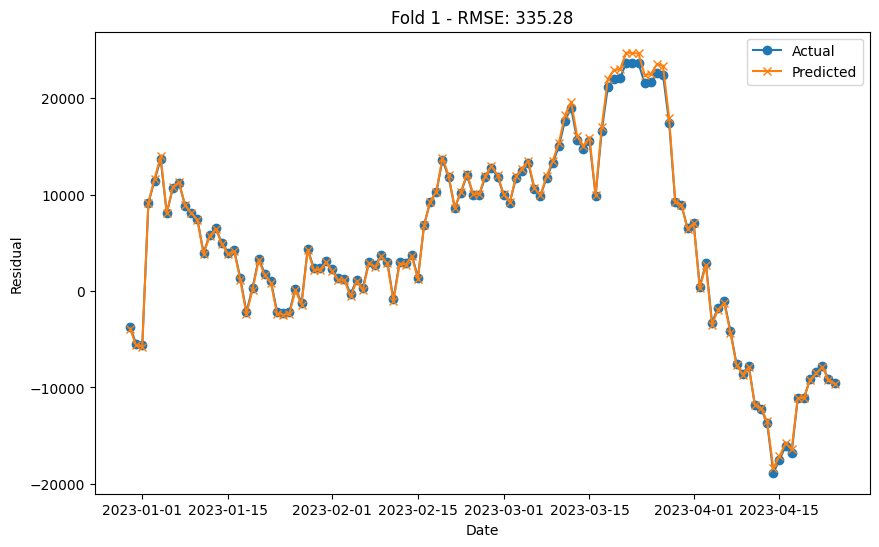

Fold 1 - RMSE: 335.28


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


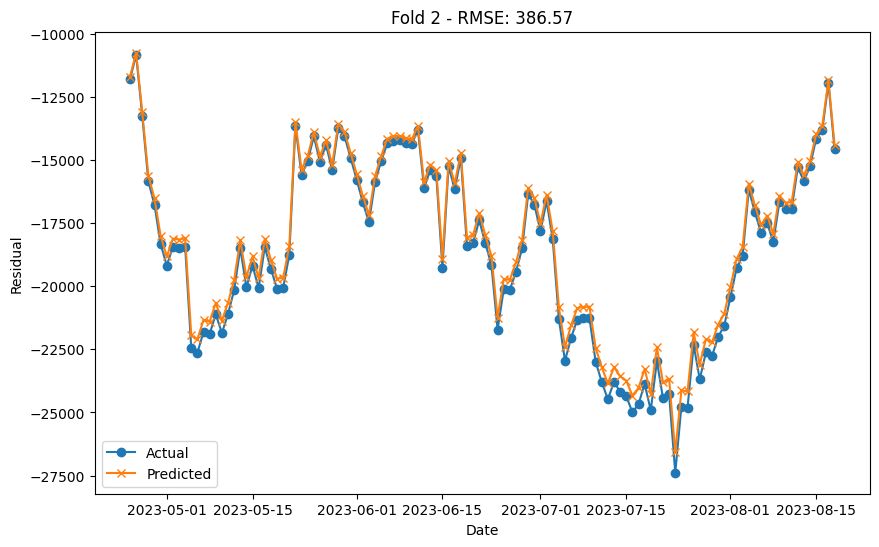

Fold 2 - RMSE: 386.57


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


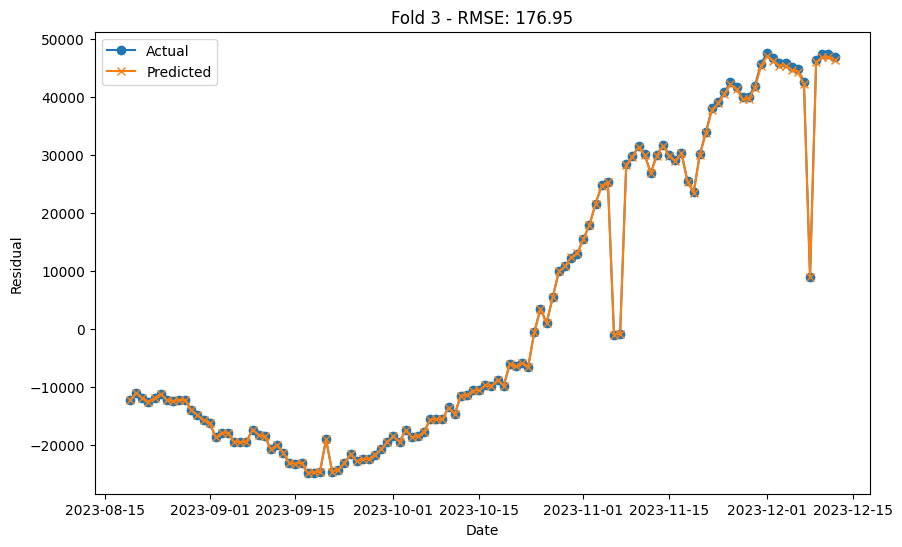

Fold 3 - RMSE: 176.95


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


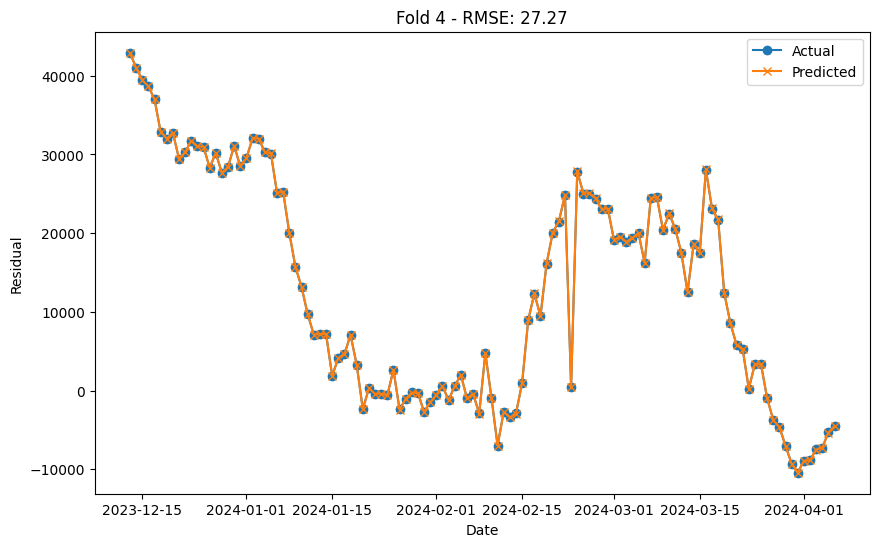

Fold 4 - RMSE: 27.27


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


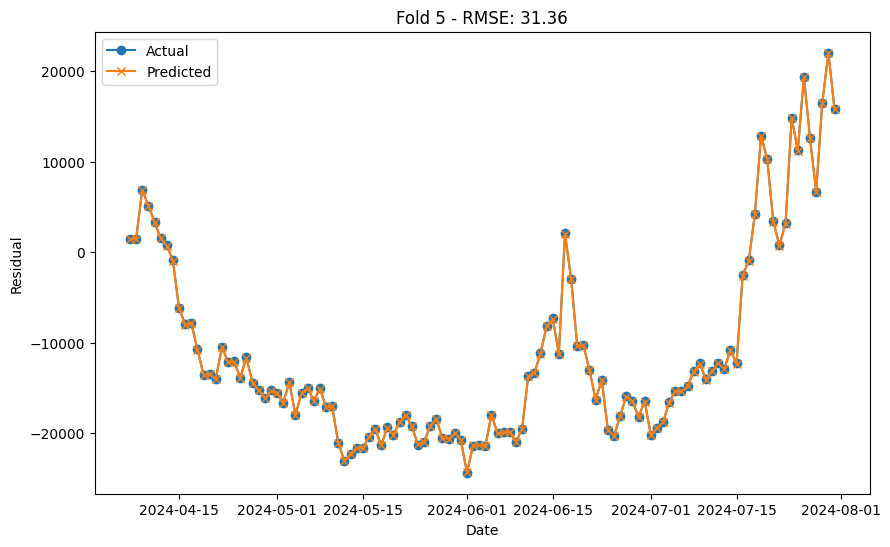

Fold 5 - RMSE: 31.36


In [8]:
#LEARNING RATE: 0,01 dan BATCH SIZE: 32

from sklearn.metrics import mean_squared_error

# Define hyperparameters
learning_rate = 0.01
batch_size = 32
epochs = 100
neurons = 50
time_step = 30

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize list to store RMSE values for each fold
rmse_values = []

# Iterate over each fold
for i, (train_index, test_index) in enumerate(tscv.split(data['Residual_normalized'])):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]

    # Create and train LSTM model
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(time_step, 1)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)  # Inisialisasi optimizer dengan learning rate
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(train_data['Residual_normalized'].values.reshape(-1, 1),
              train_data['Residual_normalized'].values.reshape(-1, 1),
              epochs=epochs, batch_size=batch_size, verbose=0)

    # Make predictions
    predictions = model.predict(test_data['Residual_normalized'].values.reshape(-1, 1))
    denormalized_predictions = scaler.inverse_transform(predictions)

    # Calculate RMSE
    actual_values = test_data['Residual'].values
    rmse = np.sqrt(mean_squared_error(actual_values, denormalized_predictions))
    rmse_values.append(rmse)

    # Plot predictions
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['Tanggal'], actual_values, label='Actual', marker='o')
    plt.plot(test_data['Tanggal'], denormalized_predictions, label='Predicted', marker='x')
    plt.title(f"Fold {i+1} - RMSE: {rmse:.2f}")
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.legend()
    plt.show()

    print(f"Fold {i+1} - RMSE: {rmse:.2f}")

### Skenario 4

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


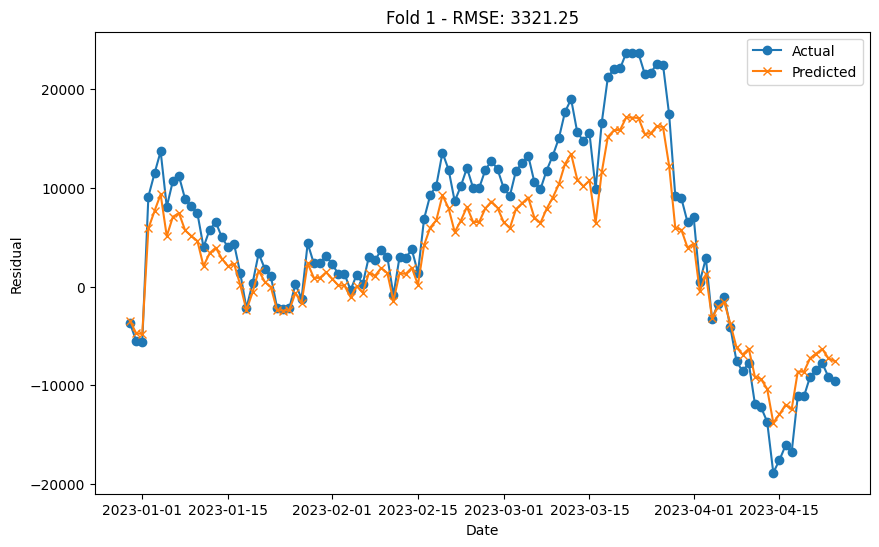

Fold 1 - RMSE: 3321.25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


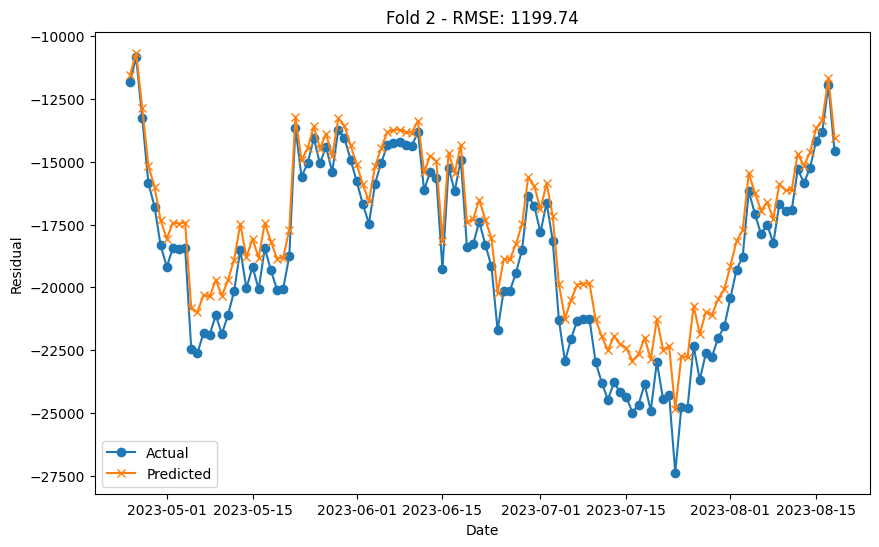

Fold 2 - RMSE: 1199.74


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


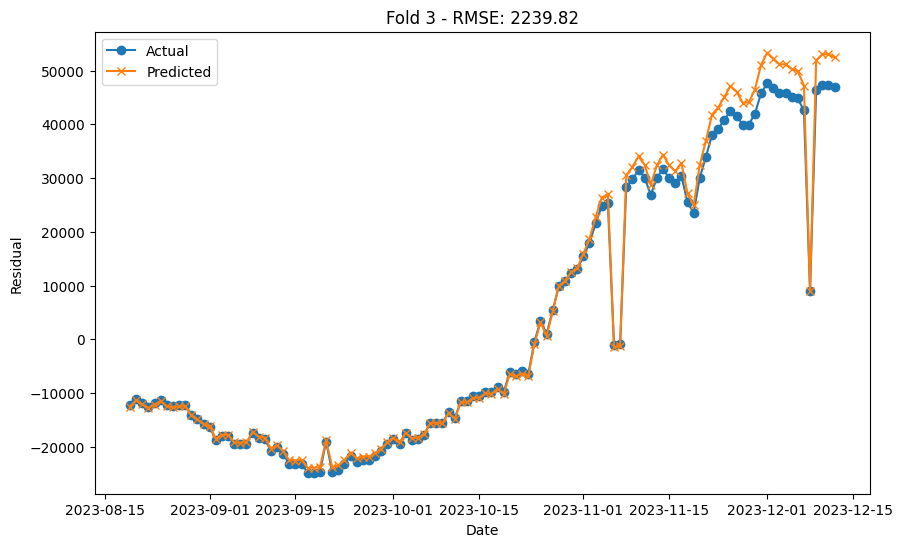

Fold 3 - RMSE: 2239.82


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


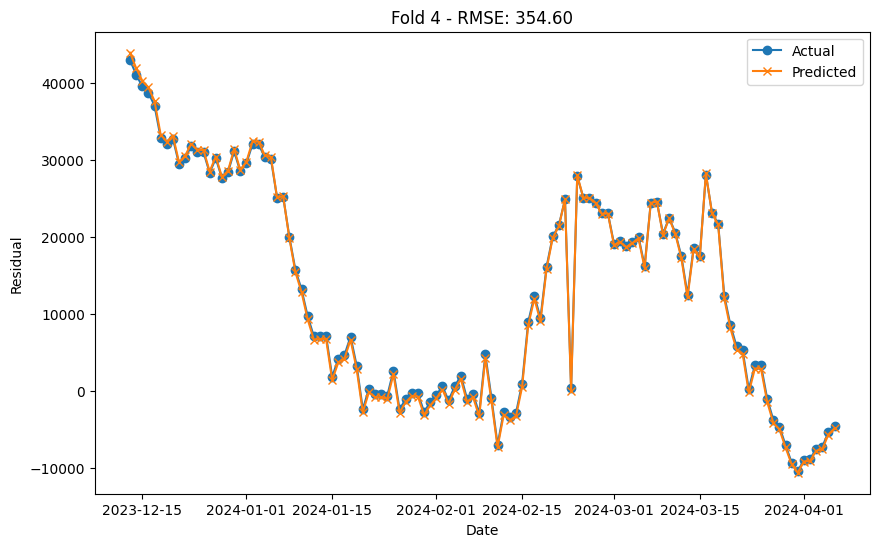

Fold 4 - RMSE: 354.60


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


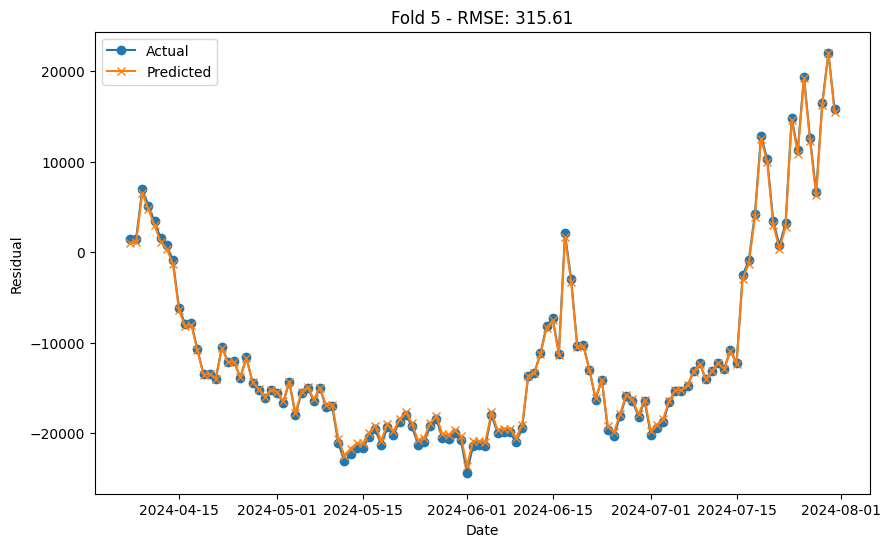

Fold 5 - RMSE: 315.61


In [9]:
#LEARNING RATE: 0,001 dan BATCH SIZE: 32

from sklearn.metrics import mean_squared_error

# Define hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 100
neurons = 50
time_step = 30

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize list to store RMSE values for each fold
rmse_values = []

# Iterate over each fold
for i, (train_index, test_index) in enumerate(tscv.split(data['Residual_normalized'])):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]

    # Create and train LSTM model
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(time_step, 1)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)  # Inisialisasi optimizer dengan learning rate
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(train_data['Residual_normalized'].values.reshape(-1, 1),
              train_data['Residual_normalized'].values.reshape(-1, 1),
              epochs=epochs, batch_size=batch_size, verbose=0)

    # Make predictions
    predictions = model.predict(test_data['Residual_normalized'].values.reshape(-1, 1))
    denormalized_predictions = scaler.inverse_transform(predictions)

    # Calculate RMSE
    actual_values = test_data['Residual'].values
    rmse = np.sqrt(mean_squared_error(actual_values, denormalized_predictions))
    rmse_values.append(rmse)

    # Plot predictions
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['Tanggal'], actual_values, label='Actual', marker='o')
    plt.plot(test_data['Tanggal'], denormalized_predictions, label='Predicted', marker='x')
    plt.title(f"Fold {i+1} - RMSE: {rmse:.2f}")
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.legend()
    plt.show()

    print(f"Fold {i+1} - RMSE: {rmse:.2f}")

# Eksplorasi Data Residual

In [11]:
data = pd.read_excel('Residual.xlsx')
data = data.loc[:, ['Tanggal', 'Residual']]
data = data.iloc[0:].reset_index(drop=True)
print(data.head())

     Tanggal     Residual
0 2022-09-01     0.000000
1 2022-09-02 -4332.389117
2 2022-09-03 -2168.018474
3 2022-09-04 -2666.770071
4 2022-09-05  -872.410987


Jumlah data latih: 578
Jumlah data uji: 122


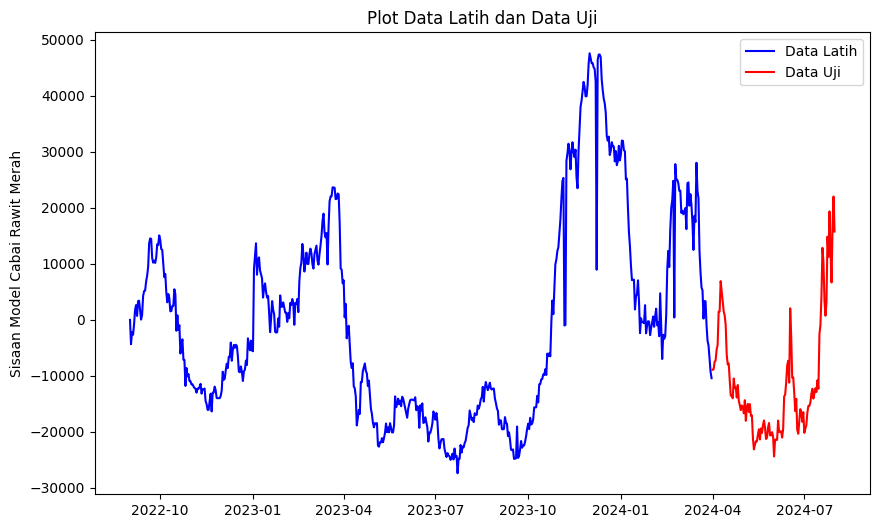

In [12]:
# Memisahkan data menjadi data latih dan data uji
train_data = data.iloc[:578]
test_data = data.iloc[578:]

# Menampilkan jumlah data dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Residual'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['Residual'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Sisaan Model Cabai Rawit Merah')
plt.legend()
plt.show()

In [13]:
# Mengambil kolom sebagai data yang akan diprediksi
time_series_data = data['Residual'].values.reshape(-1, 1)

# Normalisasi data ke rentang 0-1
scaler = MinMaxScaler()
time_series_data = scaler.fit_transform(time_series_data)

# Membagi dataset menjadi data latih dan data uji
train_size = 578
test_size = len(time_series_data) - train_size

train_data = time_series_data[:train_size]
test_data = time_series_data[train_size:]

# Fungsi untuk membuat dataset dengan sekuens deret waktu
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i : i + seq_length])
    return np.array(sequences)

# Panjang sekuens deret waktu (jumlah waktu sebelum prediksi)
seq_length = 5

# Membuat dataset dengan sekuens deret waktu
X_train = create_sequences(train_data, seq_length)
X_test = create_sequences(test_data, seq_length)

# Memisahkan fitur dan target
y_train = X_train[:, -1]
X_train = X_train[:, :-1]
y_test = X_test[:, -1]
X_test = X_test[:, :-1]

# Reshaping data untuk LSTM (jumlah sampel, panjang sekuens, jumlah fitur)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Model LSTM

In [14]:
# Membangun model LSTM
optimizer = Adam(learning_rate=0.01)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length - 1, 1)))
model.add(Dense(1))
model.compile(optimizer=optimizer, loss='mse')
# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=10)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

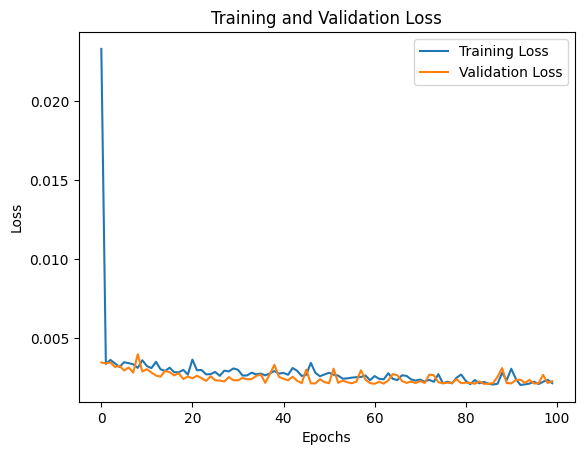

In [15]:
# Plot loss pada setiap epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


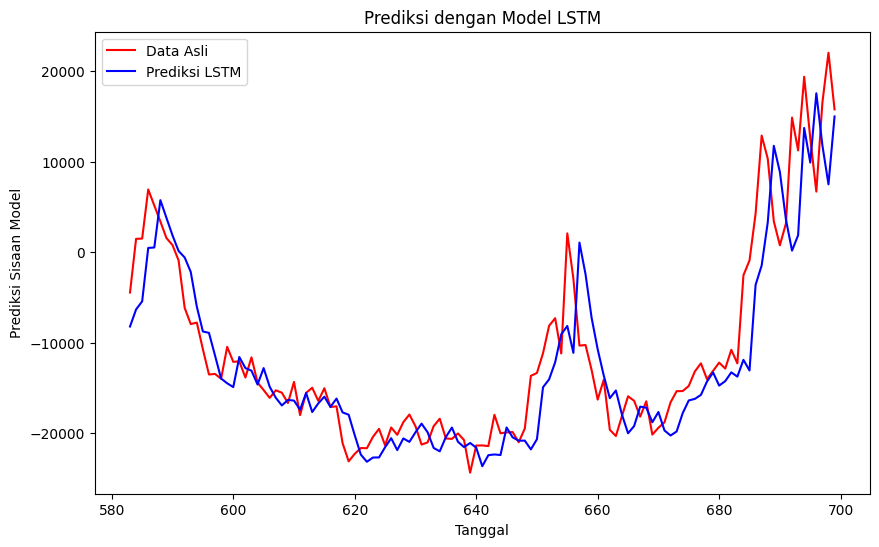

In [16]:
# Membuat prediksi dengan model LSTM
predicted = model.predict(X_test)

# Invers transform hasil prediksi ke skala aslinya
predictLSTM = scaler.inverse_transform(np.concatenate((X_test[:, -1], predicted.reshape(-1, 1)), axis=1))[:, 1]

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + seq_length:], data['Residual'].values[train_size + seq_length:], label='Data Asli', color='red')
plt.plot(data.index[train_size + seq_length:], predictLSTM, label='Prediksi LSTM', color='blue')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Prediksi Sisaan Model')
plt.legend()
plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


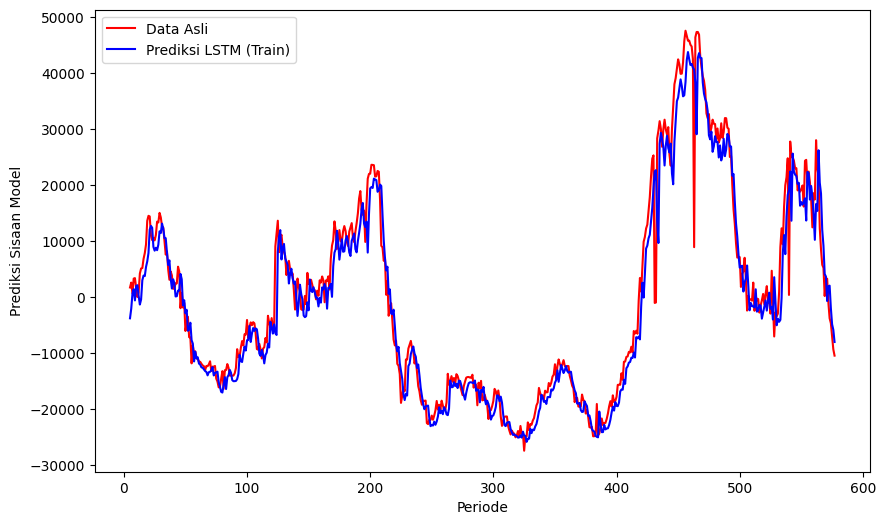

In [19]:
# Membuat prediksi dengan model LSTM pada data latih
predicted_train = model.predict(X_train)

# Invers transform hasil prediksi pada data latih ke skala aslinya
predictLSTM_train = scaler.inverse_transform(np.concatenate((X_train[:, -1], predicted_train.reshape(-1, 1)), axis=1))[:, 1]

# Sesuaikan index agar sesuai dengan panjang prediksi
adjusted_train_index = data.index[seq_length:train_size]  # Sesuaikan dengan panjang yang sama

# Plot hasil prediksi pada data latih
plt.figure(figsize=(10, 6))
plt.plot(adjusted_train_index, data['Residual'].values[seq_length:train_size], label='Data Asli', color='red')
plt.plot(adjusted_train_index, predictLSTM_train, label='Prediksi LSTM (Train)', color='blue')
plt.xlabel('Periode')
plt.ylabel('Prediksi Sisaan Model')
plt.legend()
plt.show()

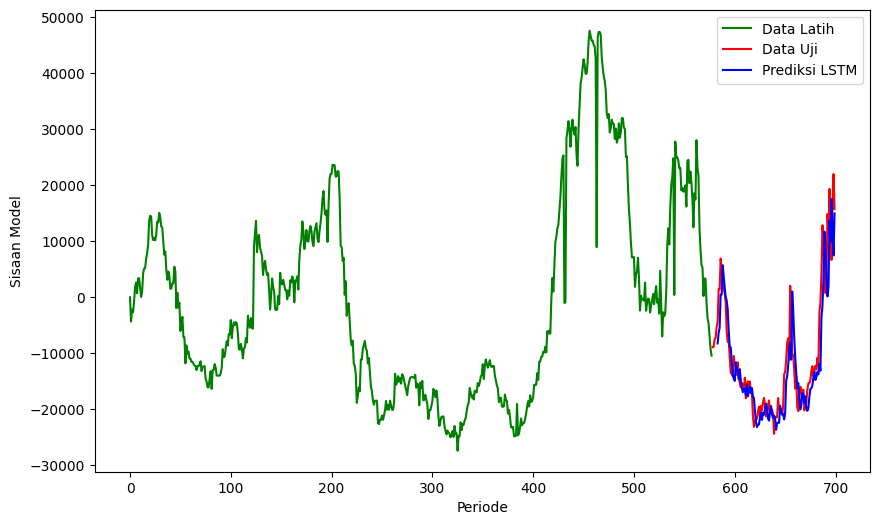

In [20]:
# Plot data latih dan data uji beserta prediksi
plt.figure(figsize=(10, 6))
plt.plot(data.index[:train_size], data['Residual'].values[:train_size], label='Data Latih', color='green')
plt.plot(data.index[train_size:], data['Residual'].values[train_size:], label='Data Uji', color='red')
plt.plot(data.index[train_size + seq_length:], predictLSTM, label='Prediksi LSTM', color='blue')
plt.xlabel('Periode')
plt.ylabel('Sisaan Model')
plt.legend()
plt.show()

In [23]:
import pandas as pd
from google.colab import files

# Konversi predictLSTM_train ke pandas DataFrame
df_predictLSTM_train = pd.DataFrame(predictLSTM_train, columns=['Prediksi_LSTM_Train'])

# Simpan DataFrame ke file Excel
df_predictLSTM_train.to_excel("predictLSTM_trainA_akhir.xlsx", index=False)
files.download("predictLSTM_trainA_akhir.xlsx")

# Konversi predictLSTM ke pandas DataFrame
df_predictLSTM_test = pd.DataFrame(predictLSTM, columns=['Prediksi_LSTM_Test'])

# Simpan DataFrame ke file Excel
df_predictLSTM_test.to_excel("predictLSTM_testA_akhir.xlsx", index=False)
files.download("predictLSTM_testA_akhir.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
df = pd.read_excel('Residual.xlsx')
df = df.loc[:, ['Harga', 'Prediksi']]

test_df = df.iloc[-117:]

Prediksi_LSTM = test_df['Prediksi'] + predictLSTM

def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Hitung MAPE
mape_value = calculate_mape(test_df['Harga'], Prediksi_LSTM)
print(f'MAPE: {mape_value:.2f}%')

MAPE: 6.12%


# Peramalan 1 Bulan

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

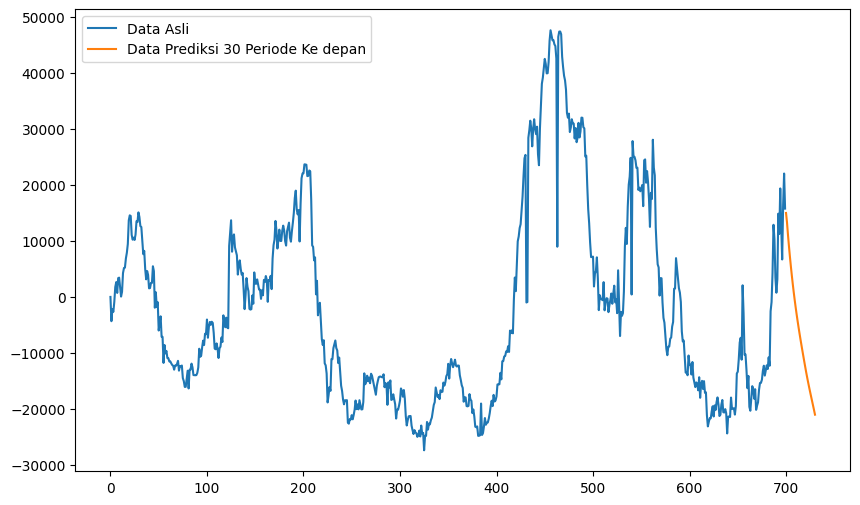

In [29]:
# Menyiapkan data untuk membuat ramalan ke depan
future_steps = 31
future_data = X_test[-1]  # Menggunakan data terakhir dari data uji sebagai awal untuk ramalan ke depan

# Membuat ramalan ke depan
future_predictions = []
for i in range(future_steps):
    prediction = model.predict(future_data.reshape(1, seq_length - 1, 1))
    future_predictions.append(prediction[0, 0])
    future_data = np.append(future_data[1:], prediction[0])  # Memperbarui data untuk ramalan berikutnya

# Invers transform hasil ramalan ke skala aslinya
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Menampilkan hasil ramalan ke depan
print("Peramalan untuk 1 bulan ke depan:", future_predictions)

# Visualisasi hasil ramalan ke depan bersama dengan data asli
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(time_series_data)), scaler.inverse_transform(time_series_data), label='Data Asli ')
plt.plot(np.arange(len(time_series_data), len(time_series_data) + future_steps), future_predictions, label='Data Prediksi 30 Periode Ke depan')
plt.legend()
plt.show()

In [30]:
future_predictions = pd.DataFrame(future_predictions)
future_predictions.to_excel("lstm_forecastA_akhir.xlsx", index=False)
files.download("lstm_forecastA_akhir.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualisasi Data Aktual dengan Garch

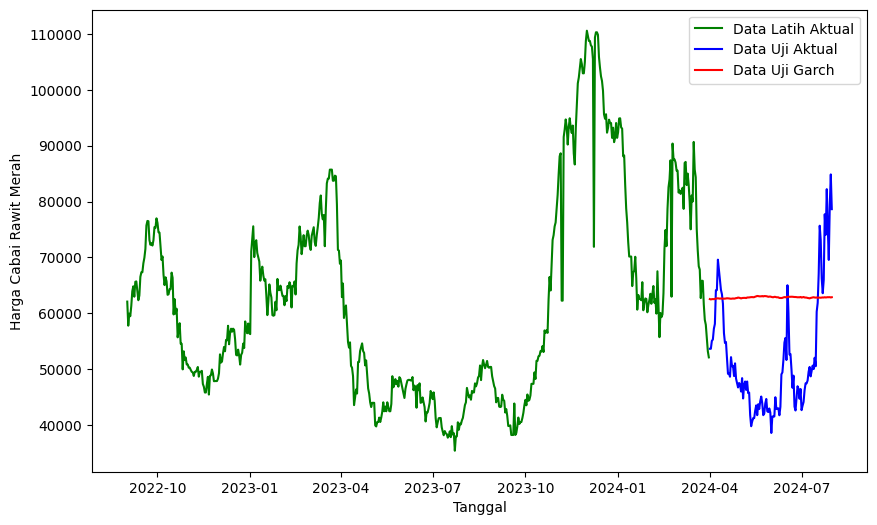

In [39]:
data = pd.read_excel("Data Final.xlsx")

test_size = 122
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Harga'], label='Data Latih Aktual', color='green')
plt.plot(test_data['Tanggal'], test_data['Harga'], label='Data Uji Aktual', color='blue')
plt.plot(test_data['Tanggal'], test_data['Garch'], label='Data Uji Garch', color='red')
plt.ylabel('Harga Cabai Rawit Merah')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

# Visualisasi Data Aktual dengan Hybrid

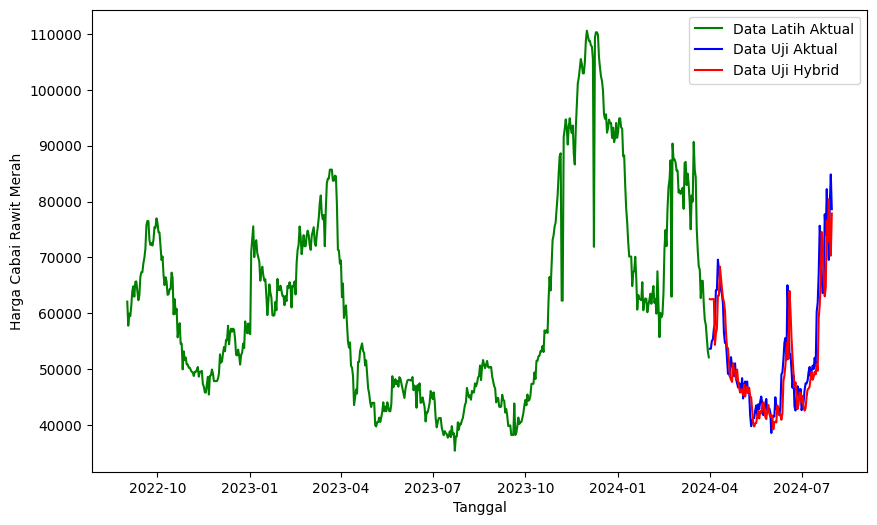

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Harga'], label='Data Latih Aktual', color='green')
plt.plot(test_data['Tanggal'], test_data['Harga'], label='Data Uji Aktual', color='blue')
plt.plot(test_data['Tanggal'], test_data['Hybrid'], label='Data Uji Hybrid', color='red')
plt.ylabel('Harga Cabai Rawit Merah')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

# Visualisasi Data Aktual-Garch-Hybrid

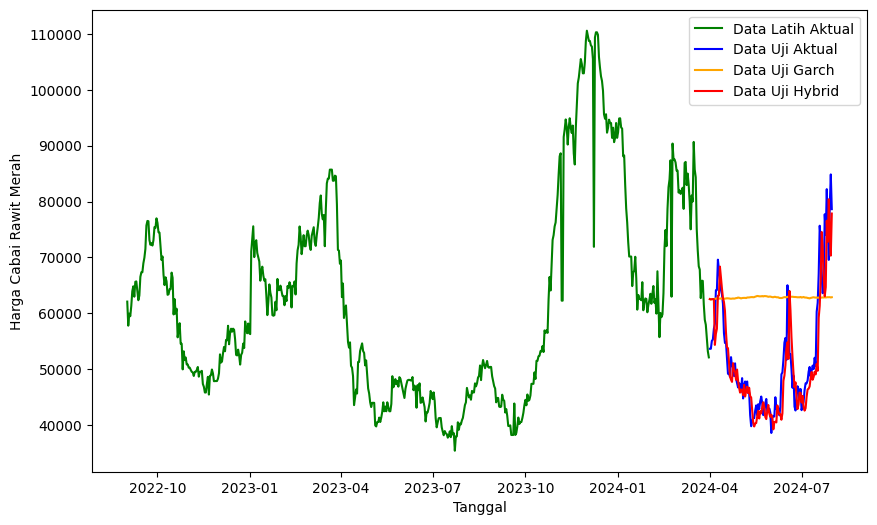

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Harga'], label='Data Latih Aktual', color='green')
plt.plot(test_data['Tanggal'], test_data['Harga'], label='Data Uji Aktual', color='blue')
plt.plot(test_data['Tanggal'], test_data['Garch'], label='Data Uji Garch', color='orange')
plt.plot(test_data['Tanggal'], test_data['Hybrid'], label='Data Uji Hybrid', color='red')
plt.ylabel('Harga Cabai Rawit Merah')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

# Visualisasi Penuh Aktual Garch

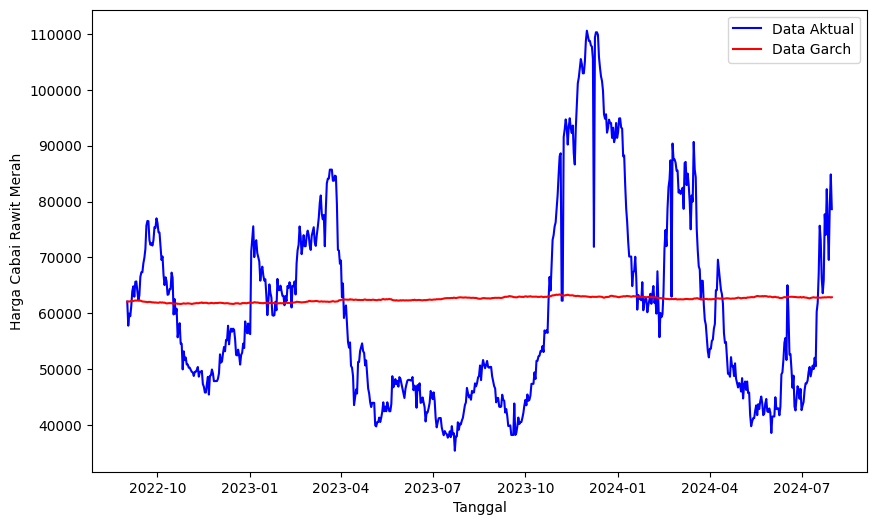

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(data['Tanggal'], data['Harga'], label='Data Aktual', color='blue')
plt.plot(data['Tanggal'], data['Garch'], label='Data Garch', color='red')
plt.ylabel('Harga Cabai Rawit Merah')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

# Visualisasi Penuh Aktual Hybrid

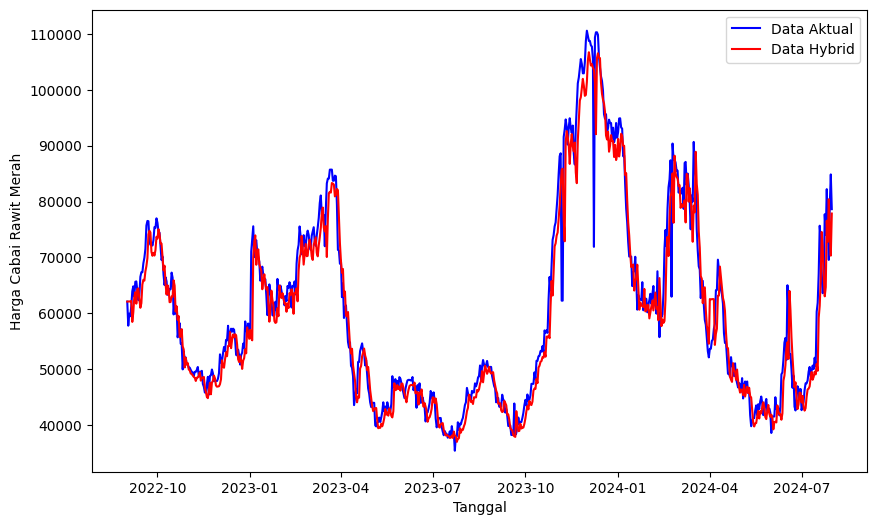

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(data['Tanggal'], data['Harga'], label='Data Aktual', color='blue')
plt.plot(data['Tanggal'], data['Hybrid'], label='Data Hybrid', color='red')
plt.ylabel('Harga Cabai Rawit Merah')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

# Visualisasi Penuh Aktual Garch Hybrid

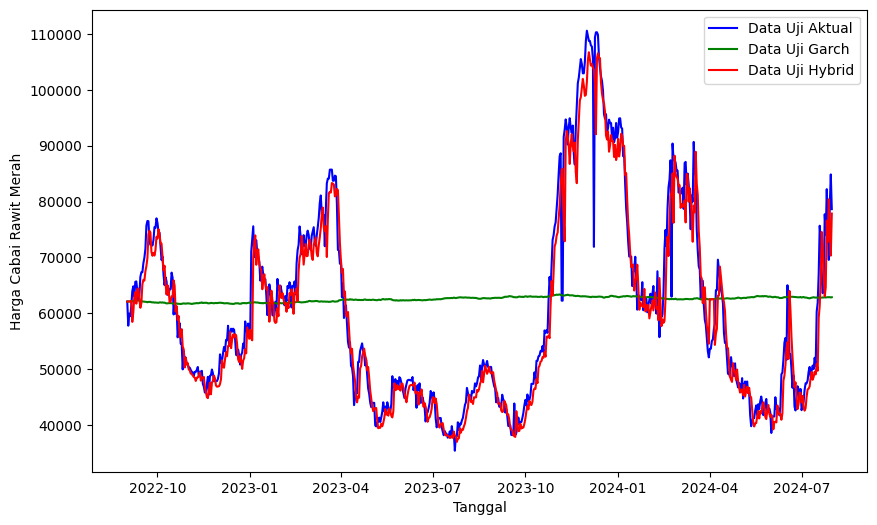

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(data['Tanggal'], data['Harga'], label='Data Uji Aktual', color='blue')
plt.plot(data['Tanggal'], data['Garch'], label='Data Uji Garch', color='green')
plt.plot(data['Tanggal'], data['Hybrid'], label='Data Uji Hybrid', color='red')
plt.ylabel('Harga Cabai Rawit Merah')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

# Visualisasi Data Ramal

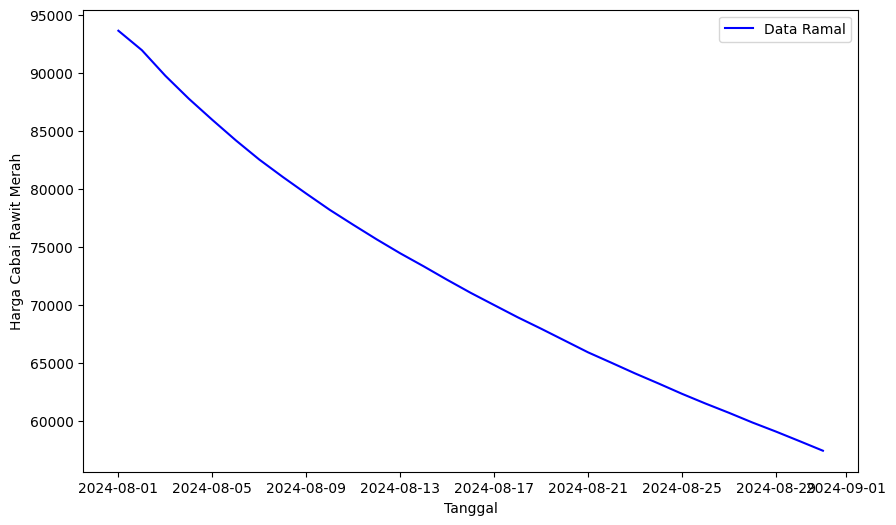

In [45]:
dt = pd.read_excel("Peramalan Agustus.xlsx")

plt.figure(figsize=(10, 6))
plt.plot(dt['Tanggal'], dt['Hybrid'], label='Data Ramal', color='blue')
plt.ylabel('Harga Cabai Rawit Merah')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

# Visualisasi Data Ramal dengan Data Aktual

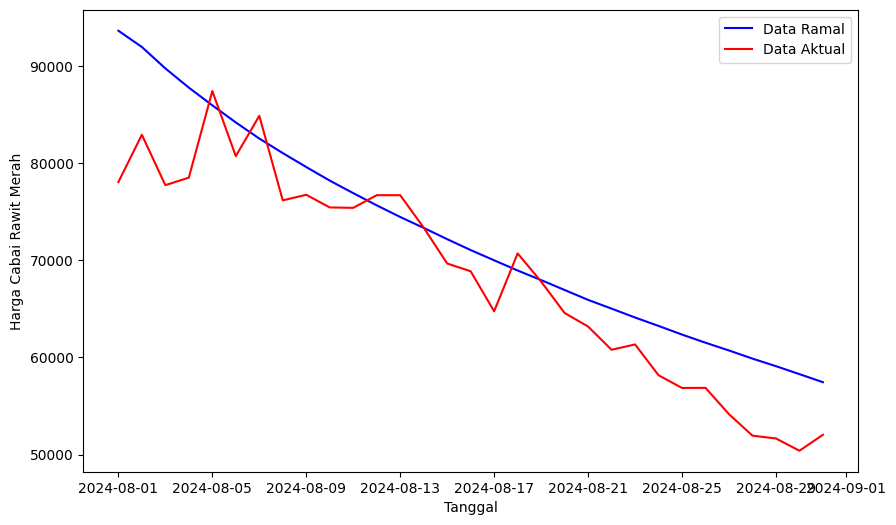

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(dt['Tanggal'], dt['Hybrid'], label='Data Ramal', color='blue')
plt.plot(dt['Tanggal'], dt['Aktual'], label='Data Aktual', color='red')
plt.ylabel('Harga Cabai Rawit Merah')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

# Visualisasi Data Ramal Aktual dengan Garch dan Hybrid

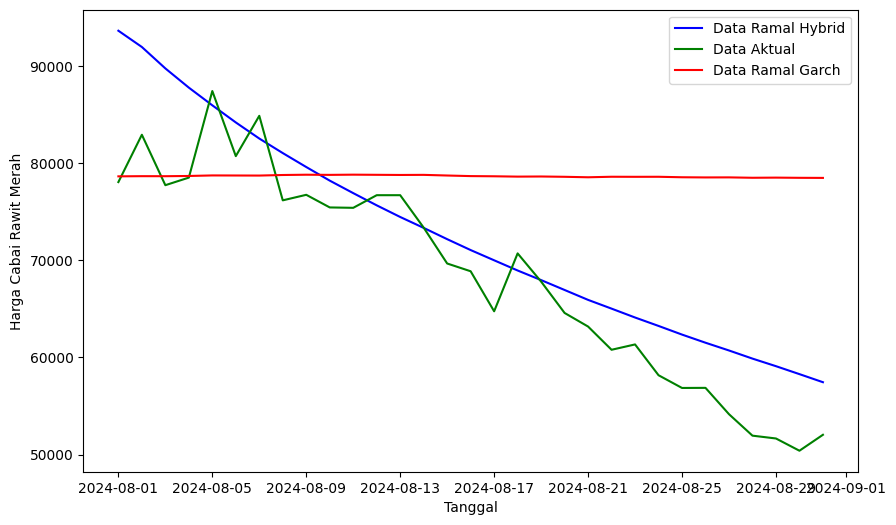

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(dt['Tanggal'], dt['Hybrid'], label='Data Ramal Hybrid', color='blue')
plt.plot(dt['Tanggal'], dt['Aktual'], label='Data Aktual', color='green')
plt.plot(dt['Tanggal'], dt['Garch'], label='Data Ramal Garch', color='red')
plt.ylabel('Harga Cabai Rawit Merah')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

# Visualisasi 700 Data dengan Data Ramal

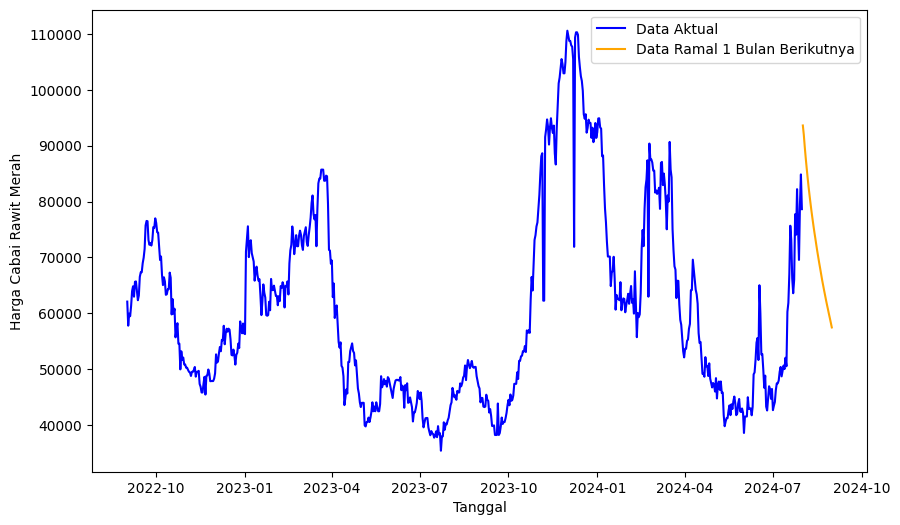

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(data['Tanggal'], data['Harga'], label='Data Aktual', color='blue')
plt.plot(dt['Tanggal'], dt['Hybrid'], label='Data Ramal 1 Bulan Berikutnya', color='orange')
plt.ylabel('Harga Cabai Rawit Merah')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

# Visualisasi 700 Data dengan Data Ramal dan Aktual Agustus

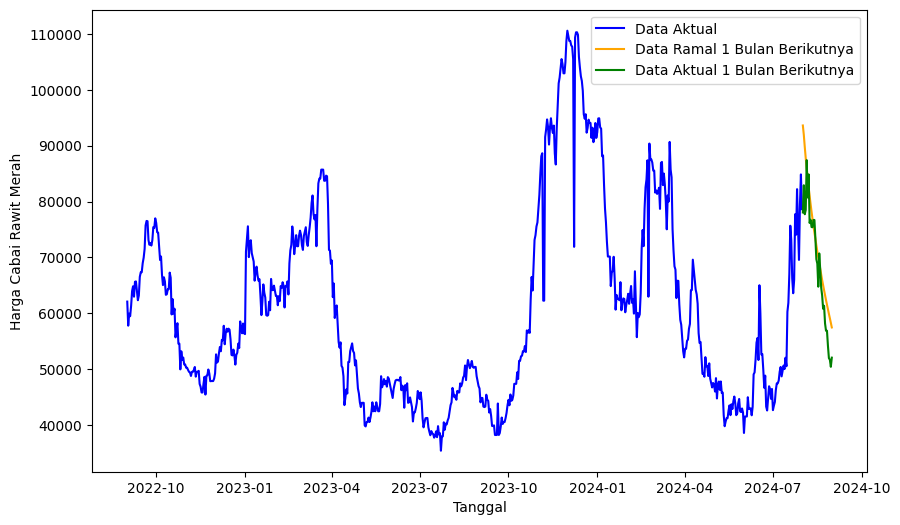

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(data['Tanggal'], data['Harga'], label='Data Aktual', color='blue')
plt.plot(dt['Tanggal'], dt['Hybrid'], label='Data Ramal 1 Bulan Berikutnya', color='orange')
plt.plot(dt['Tanggal'], dt['Aktual'], label='Data Aktual 1 Bulan Berikutnya', color='green')
plt.ylabel('Harga Cabai Rawit Merah')
plt.xlabel('Tanggal')
plt.legend()
plt.show()